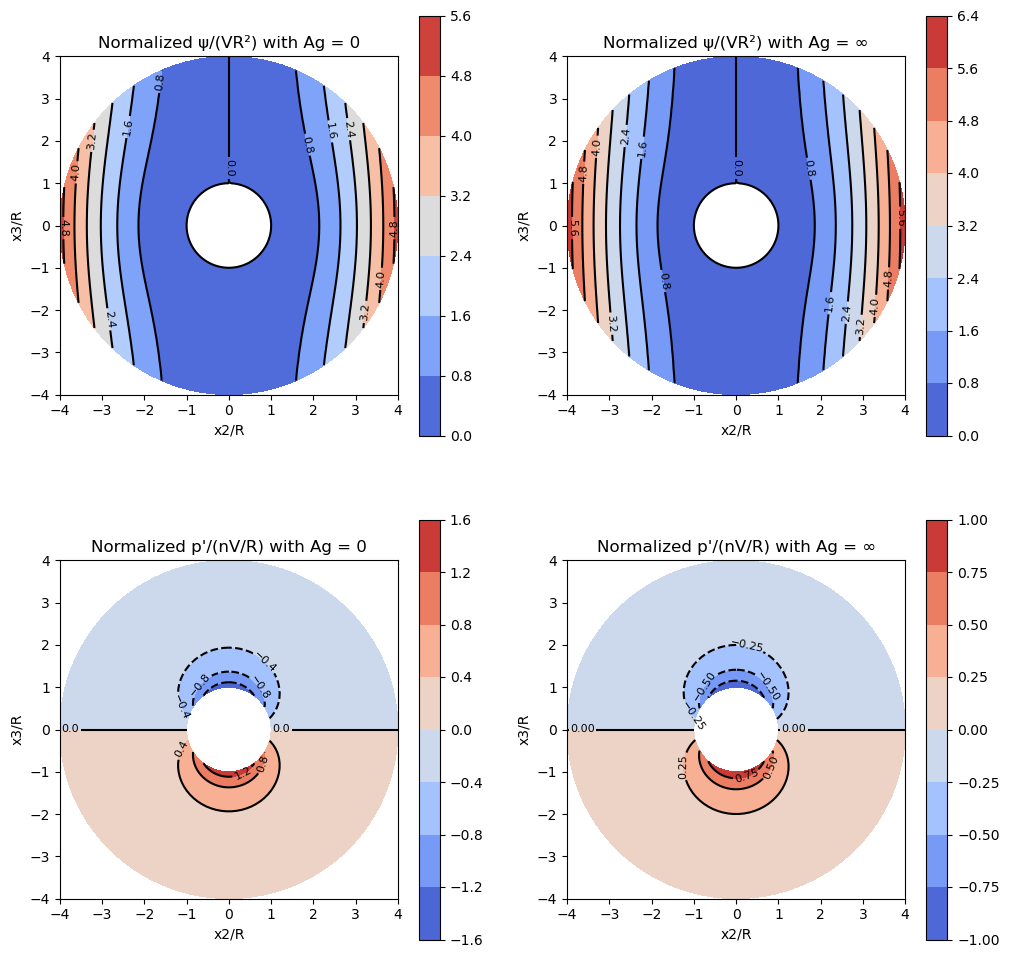

<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def stream_function_element(r, theta, Ag):
    if Ag == np.inf:
        psi = V * (0.5 * (r/R)**2 - 0.75*2/3 * r/R + 0) * R**2 * np.sin(theta)**2
    else:
        psi = V * (0.5 * (r/R)**2 - 0.75 * (1 + 2 * Ag) * r / (1 + 3 * Ag) / R + 0.25 * R / (1 + 3 * Ag) / r) * R**2 * np.sin(theta)**2
    return psi

def pressure_element(r, theta, Ag):
    if Ag == np.inf:
        pl_contours = -1.5 * 2/3 * (R/r)**2 * np.cos(theta)
    else:
        pl_contours = -1.5 * (1 + 2 * Ag) / (1 + 3 * Ag) * (R/r)**2 * np.cos(theta)
    return pl_contours

# Constants
V = 1
R = 1
n_points = 100

# Spherical coordinates
r = np.linspace(1, 4, n_points)
theta = np.linspace(0, 2 * np.pi, n_points)
r_grid, theta_grid = np.meshgrid(r, theta)

# Vectorizing the stream_function_element and pressure_element functions
stream_function_vec = np.vectorize(stream_function_element)
pressure_vec = np.vectorize(pressure_element)

# Stream functions and pressure for Ag = 0 (no-slip) and Ag = infinity (perfect slip)
psi_no_slip = stream_function_vec(r_grid, theta_grid, Ag=0)
psi_perfect_slip = stream_function_vec(r_grid, theta_grid, Ag=np.inf)
pressure_no_slip = pressure_vec(r_grid, theta_grid, Ag=0)
pressure_perfect_slip = pressure_vec(r_grid, theta_grid, Ag=np.inf)
# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Normalized stream function ψ/(VR²) with Ag = 0 (left)
cont1 = axs[0, 0].contourf(r_grid * np.sin(theta_grid), r_grid * np.cos(theta_grid), psi_no_slip, cmap='coolwarm')
cont1_lines = axs[0, 0].contour(r_grid * np.sin(theta_grid), r_grid * np.cos(theta_grid), psi_no_slip, colors='k')
axs[0, 0].clabel(cont1_lines, inline=True, fontsize=8)
axs[0, 0].set_title('Normalized ψ/(VR²) with Ag = 0')
fig.colorbar(cont1, ax=axs[0, 0])

# Normalized stream function ψ/(VR²) with Ag = ∞ (right)
cont2 = axs[0, 1].contourf(r_grid * np.sin(theta_grid), r_grid * np.cos(theta_grid), psi_perfect_slip, cmap='coolwarm')
cont2_lines = axs[0, 1].contour(r_grid * np.sin(theta_grid), r_grid * np.cos(theta_grid), psi_perfect_slip, colors='k')
axs[0, 1].clabel(cont2_lines, inline=True, fontsize=8)
axs[0, 1].set_title('Normalized ψ/(VR²) with Ag = ∞')
fig.colorbar(cont2, ax=axs[0, 1])

# Normalized pressure contours p'/(nV/R) with Ag = 0 (left)
cont3 = axs[1, 0].contourf(r_grid * np.sin(theta_grid), r_grid * np.cos(theta_grid), pressure_no_slip, cmap='coolwarm')
cont3_lines = axs[1, 0].contour(r_grid * np.sin(theta_grid), r_grid * np.cos(theta_grid), pressure_no_slip, colors='k')
axs[1, 0].clabel(cont3_lines, inline=True, fontsize=8)
axs[1, 0].set_title("Normalized p'/(nV/R) with Ag = 0")
fig.colorbar(cont3, ax=axs[1, 0])

# Normalized pressure contours p'/(nV/R) with Ag = ∞ (right)
cont4 = axs[1, 1].contourf(r_grid * np.sin(theta_grid), r_grid * np.cos(theta_grid), pressure_perfect_slip, cmap='coolwarm')
cont4_lines = axs[1, 1].contour(r_grid * np.sin(theta_grid), r_grid * np.cos(theta_grid), pressure_perfect_slip, colors='k')
axs[1, 1].clabel(cont4_lines, inline=True, fontsize=8)
axs[1, 1].set_title("Normalized p'/(nV/R) with Ag = ∞")
fig.colorbar(cont4, ax=axs[1, 1])

for ax in axs.flat:
    ax.set_xlabel('x2/R')
    ax.set_ylabel('x3/R')
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_aspect('equal')

plt.show()
plt.savefig('Normalized_psi_Ag_0.png', bbox_inches='tight')
plt.savefig('Normalized_psi_Ag_inf.png', bbox_inches='tight')
plt.savefig("Normalized_pressure_Ag_0.png", bbox_inches='tight')
plt.savefig("Normalized_pressure_Ag_inf.png", bbox_inches='tight')

plt.show()

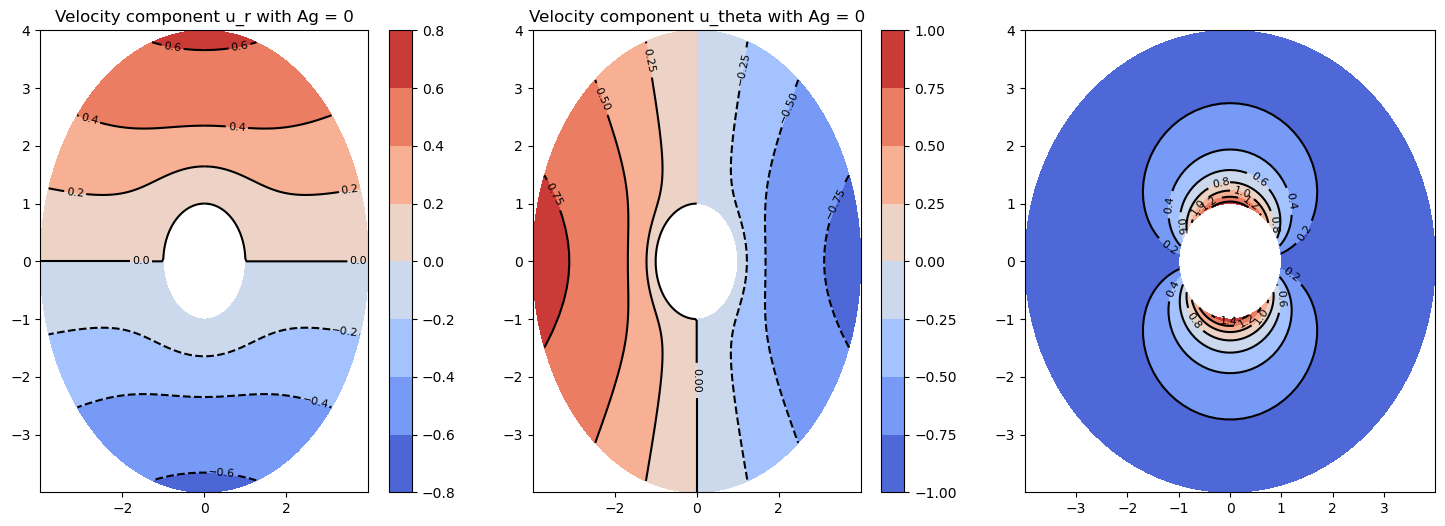

In [6]:
def velocity_components(r, theta, Ag):
    if Ag == np.inf:
        u_r = V * (1-R/r+0)*np.cos(theta)
        u_theta = -V*(1-0.5*(R/r))*np.sin(theta)
        
    else:
        u_r = V*(1-1.5*(1+2*Ag)/(1+3*Ag)*(R/r)+0.5*(R/r)**3/(1+3*Ag))*np.cos(theta)
        u_theta = -V*(1-0.75*(1+2*Ag)/(1+3*Ag)*(R/r)-0.25*(R/r)**3/(1+3*Ag))*np.sin(theta)
    return u_r, u_theta

# Vectorizing the velocity_components function
velocity_components_vec = np.vectorize(velocity_components)

# Velocity components for Ag = 0 (no-slip)
u_r_no_slip, u_theta_no_slip = velocity_components_vec(r_grid, theta_grid, Ag=0)

# Absolute pressure for Ag = 0 (no-slip)
abs_pressure_no_slip = np.abs(pressure_no_slip)

# Plotting velocity components and absolute pressure for Ag = 0 (no-slip)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Velocity component u_r with Ag = 0 (left)
cont1 = axs[0].contourf(r_grid * np.sin(theta_grid), r_grid * np.cos(theta_grid), u_r_no_slip, cmap='coolwarm')
cont1_lines = axs[0].contour(r_grid * np.sin(theta_grid), r_grid * np.cos(theta_grid), u_r_no_slip, colors='k')
axs[0].clabel(cont1_lines, inline=True, fontsize=8)
axs[0].set_title('Velocity component u_r with Ag = 0')
fig.colorbar(cont1, ax=axs[0])

# Velocity component u_theta with Ag = 0 (middle)
cont2 = axs[1].contourf(r_grid * np.sin(theta_grid), r_grid * np.cos(theta_grid), u_theta_no_slip, cmap='coolwarm')
cont2_lines = axs[1].contour(r_grid * np.sin(theta_grid), r_grid * np.cos(theta_grid), u_theta_no_slip, colors='k')
axs[1].clabel(cont2_lines, inline=True, fontsize=8)
axs[1].set_title('Velocity component u_theta with Ag = 0')
fig.colorbar(cont2, ax=axs[1])

# Absolute pressure with Ag = 0 (right)
cont3 = axs[2].contourf(r_grid * np.sin(theta_grid), r_grid * np.cos(theta_grid), abs_pressure_no_slip, cmap='coolwarm')
cont3_lines = axs[2].contour(r_grid * np.sin(theta_grid), r_grid * np.cos(theta_grid), abs_pressure_no_slip, colors='k')
axs[2].clabel(cont3_lines, inline=True, fontsize=8)
plt.savefig('velocity and absolute pressure.png', bbox_inches='tight')


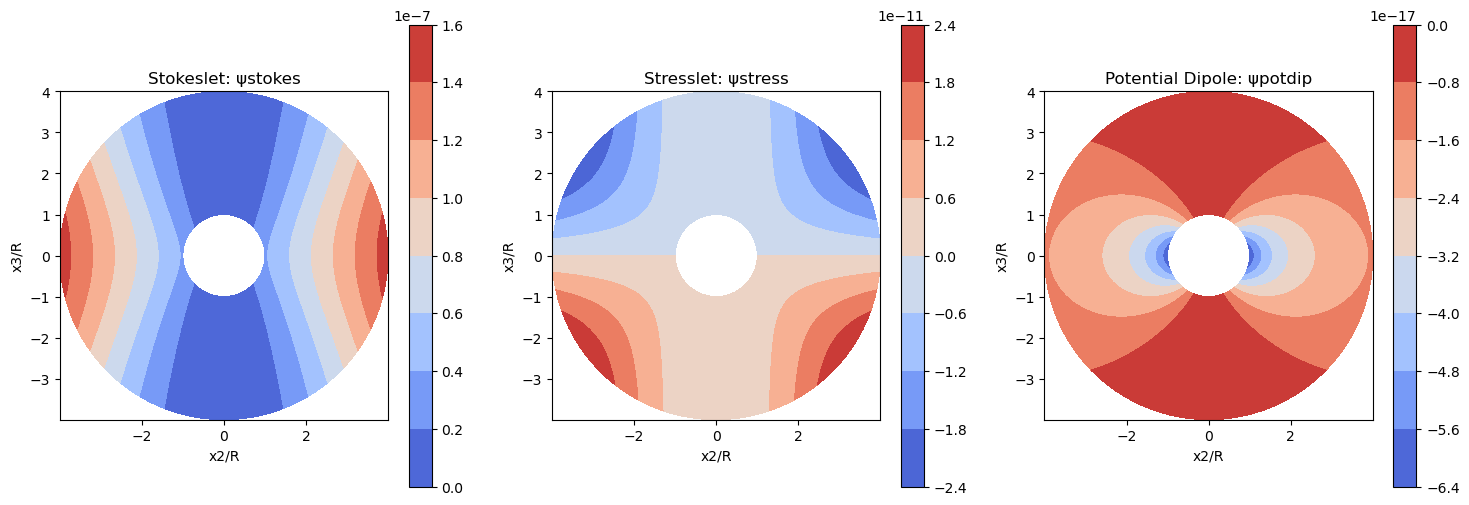

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Stream function equations
def psi_stokes(r, theta, U,a):
    return 0.75 * U*a * r * np.sin(theta)**2

def psi_stress(r, theta, U,a):
    return -1.5 * U*a**2 * (r**2) * np.cos(theta) * np.sin(theta)**2

def psi_potdip(r, theta, U,a):
    return -0.5 * U*a**3 * (r**-1) * np.sin(theta)**2

# Constants
U = 1e-3
a = 50e-6
n_points = 100

# Spherical coordinates
r = np.linspace(1, 4, n_points)
theta = np.linspace(0, 2 * np.pi, n_points)
r_grid, theta_grid = np.meshgrid(r, theta)

# Compute stream functions
psi_stokes_grid = psi_stokes(r_grid, theta_grid, U,a)
psi_stress_grid = psi_stress(r_grid, theta_grid, U,a)
psi_potdip_grid = psi_potdip(r_grid, theta_grid, U,a)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

cont1 = axs[0].contourf(r_grid * np.sin(theta_grid), r_grid * np.cos(theta_grid), psi_stokes_grid, cmap='coolwarm')
axs[0].set_title('Stokeslet: ψstokes')
fig.colorbar(cont1, ax=axs[0])

cont2 = axs[1].contourf(r_grid * np.sin(theta_grid), r_grid * np.cos(theta_grid), psi_stress_grid, cmap='coolwarm')
axs[1].set_title('Stresslet: ψstress')
fig.colorbar(cont2, ax=axs[1])

cont3 = axs[2].contourf(r_grid * np.sin(theta_grid), r_grid * np.cos(theta_grid), psi_potdip_grid, cmap='coolwarm')
axs[2].set_title('Potential Dipole: ψpotdip')
fig.colorbar(cont3, ax=axs[2])

for ax in axs:
    ax.set_xlabel('x2/R')
    ax.set_ylabel('x3/R')
    ax.set_aspect('equal')

plt.show()

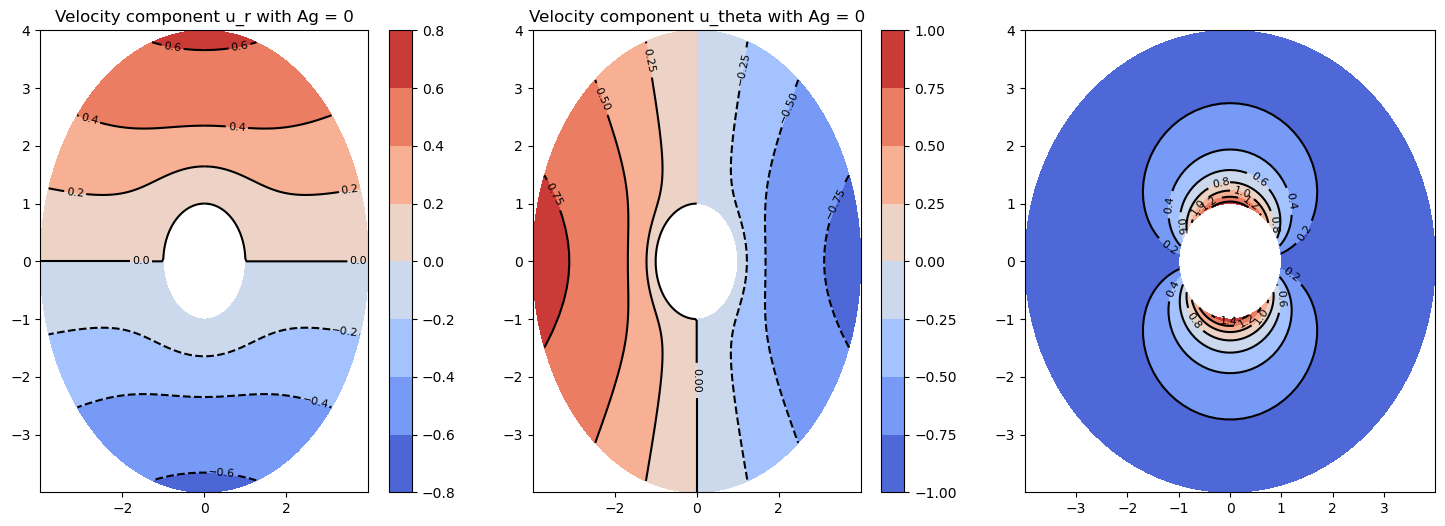

In [5]:
def velocity_components(r, theta, Ag):
    if Ag == np.inf:
        u_r = V * (1-R/r+0)*np.cos(theta)
        u_theta = -V*(1-0.5*(R/r))*np.sin(theta)
        
    else:
        u_r = V*(1-1.5*(1+2*Ag)/(1+3*Ag)*(R/r)+0.5*(R/r)**3/(1+3*Ag))*np.cos(theta)
        u_theta = -V*(1-0.75*(1+2*Ag)/(1+3*Ag)*(R/r)-0.25*(R/r)**3/(1+3*Ag))*np.sin(theta)
    return u_r, u_theta

# Vectorizing the velocity_components function
velocity_components_vec = np.vectorize(velocity_components)

# Velocity components for Ag = 0 (no-slip)
u_r_no_slip, u_theta_no_slip = velocity_components_vec(r_grid, theta_grid, Ag=0)

# Absolute pressure for Ag = 0 (no-slip)
abs_pressure_no_slip = np.abs(pressure_no_slip)

# Plotting velocity components and absolute pressure for Ag = 0 (no-slip)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Velocity component u_r with Ag = 0 (left)
cont1 = axs[0].contourf(r_grid * np.sin(theta_grid), r_grid * np.cos(theta_grid), u_r_no_slip, cmap='coolwarm')
cont1_lines = axs[0].contour(r_grid * np.sin(theta_grid), r_grid * np.cos(theta_grid), u_r_no_slip, colors='k')
axs[0].clabel(cont1_lines, inline=True, fontsize=8)
axs[0].set_title('Velocity component u_r with Ag = 0')
fig.colorbar(cont1, ax=axs[0])

# Velocity component u_theta with Ag = 0 (middle)
cont2 = axs[1].contourf(r_grid * np.sin(theta_grid), r_grid * np.cos(theta_grid), u_theta_no_slip, cmap='coolwarm')
cont2_lines = axs[1].contour(r_grid * np.sin(theta_grid), r_grid * np.cos(theta_grid), u_theta_no_slip, colors='k')
axs[1].clabel(cont2_lines, inline=True, fontsize=8)
axs[1].set_title('Velocity component u_theta with Ag = 0')
fig.colorbar(cont2, ax=axs[1])

# Absolute pressure with Ag = 0 (right)
cont3 = axs[2].contourf(r_grid * np.sin(theta_grid), r_grid * np.cos(theta_grid), abs_pressure_no_slip, cmap='coolwarm')
cont3_lines = axs[2].contour(r_grid * np.sin(theta_grid), r_grid * np.cos(theta_grid), abs_pressure_no_slip, colors='k')
axs[2].clabel(cont3_lines, inline=True, fontsize=8)
plt.savefig('velocity and absolute pressure.png', bbox_inches='tight')
